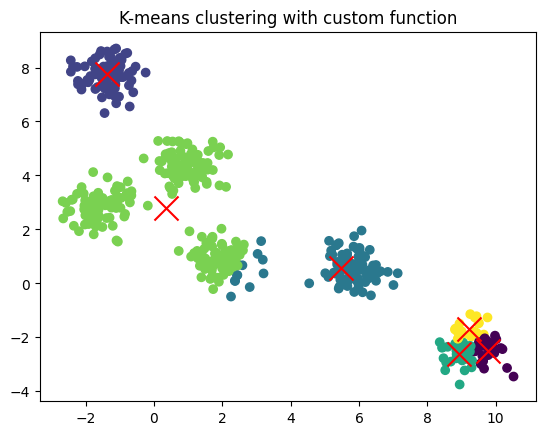

In [45]:
import numpy as np

def compute_centroids(X, labels, k):
    """Compute the centroid of each cluster."""
    
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        centroids[i, :] = np.mean(X[labels == i, :], axis=0)
    return centroids

def assign_labels(X, centroids):
    """Assign each data point to the closest centroid."""
    
    labels = np.zeros(X.shape[0], dtype=int)
    for i in range(X.shape[0]):
        distances = np.linalg.norm(X[i, :] - centroids, axis=1)
        labels[i] = np.argmin(distances)
    return labels

def kmeans(X, k, max_iters=100):
    """Perform K-means clustering."""
    
    # Randomly initialize the centroids as k random points from the dataset.
    np.random.seed(42)
    random_idx = np.random.permutation(X.shape[0])
    centroids = X[random_idx[:k], :]
    
    for iteration in range(max_iters):
        labels = assign_labels(X, centroids) # assign each data to the closest centroid
        new_centroids = compute_centroids(X, labels, k) # compute the centroid for each cluster
        
        # Check for convergence (if centroids do not change)
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
        
    return centroids, labels



# Example usage with dummy data
if __name__ == "__main__":
    import matplotlib.pyplot as plt
    
    # Generating some dummy data
    from sklearn.datasets import make_blobs
    X, _ = make_blobs(n_samples=500, centers=6, cluster_std=0.5, random_state=0)
    
    
    # Apply custom K-means
    k = 6
    centroids, labels = kmeans(X, k)
    
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='x')
    plt.title('K-means clustering with custom function')
    plt.show()


In [4]:
from sklearn.cluster import KMeans
import numpy as np

# select some dataset
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

# number of clusters k
k =2

# K-means algorithm
kmeans = KMeans(n_clusters = k, random_state=0).fit(X)

# cluster centers (centroids)
centroids = kmeans.cluster_centers_

# labels of each point
labels = kmeans.labels_

print("Centroids:\n", centroids)
print("Labels:\n", labels)


Centroids:
 [[10.  2.]
 [ 1.  2.]]
Labels:
 [1 1 1 0 0 0]


In [6]:
# Use this to predict the cluster of new points
new_samples = np.array([[0, 0], [12, 3]])
print("New Samples Labels:\n", kmeans.predict(new_samples))

New Samples Labels:
 [1 0]


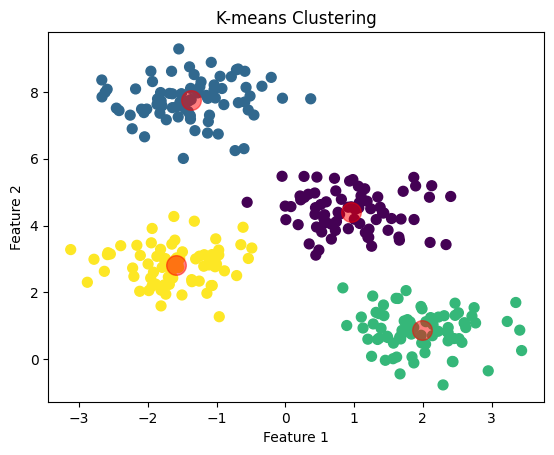

In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data for demonstration
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Apply K-means with the desired number of clusters (k)
k = 4
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], s=50, c=y_kmeans, cmap='viridis')

# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

# Display the graph
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


Cluster centers:
 [[10.  2.]
 [ 5.  3.]
 [ 1.  2.]]
Labels for each point: [2 2 2 0 0 0 1 1 1 1]


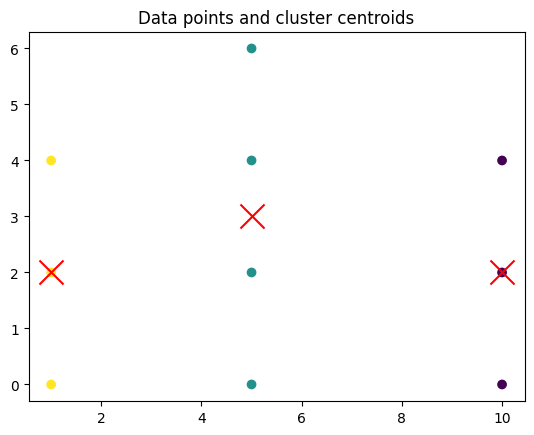

In [19]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Example data: 10 data points in 2D space
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0],
              [5, 2], [5, 4], [5, 0], [5, 6]])

# Apply the K-means algorithm with sklearn
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Print the cluster centers and the labels for each point
print("Cluster centers:\n", kmeans.cluster_centers_)
print("Labels for each point:", kmeans.labels_)

# Plotting the results:
# Scatter plot of the data points, colored by label
# Plus markers for the cluster centers
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')
plt.title('Data points and cluster centroids')
plt.show()


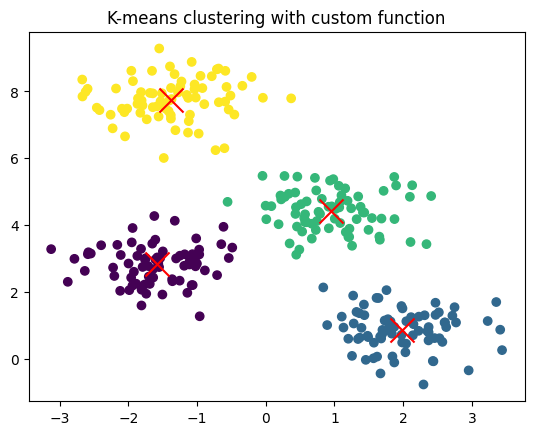

In [28]:
import numpy as np

def compute_centroids(X, labels, k):
    """Compute the centroid of each cluster."""
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        centroids[i, :] = np.mean(X[labels == i, :], axis=0)
    return centroids

def assign_labels(X, centroids):
    """Assign each data point to the closest centroid."""
    labels = np.zeros(X.shape[0], dtype=int)
    for i in range(X.shape[0]):
        distances = np.linalg.norm(X[i, :] - centroids, axis=1)
        labels[i] = np.argmin(distances)
    return labels

def kmeans(X, k, max_iters=100):
    """Perform K-means clustering."""
    # Randomly initialize the centroids as k random points from the dataset.
    np.random.seed(42)
    random_idx = np.random.permutation(X.shape[0])
    centroids = X[random_idx[:k], :]
    
    for iteration in range(max_iters):
        labels = assign_labels(X, centroids)
        new_centroids = compute_centroids(X, labels, k)
        
        # Check for convergence (if centroids do not change)
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
        
    return centroids, labels

# Example usage with dummy data
if __name__ == "__main__":
    import matplotlib.pyplot as plt
    
    # Generating some dummy data
    from sklearn.datasets import make_blobs
    X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
    
    # Apply custom K-means
    k = 4
    centroids, labels = kmeans(X, k)
    
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='x')
    plt.title('K-means clustering with custom function')
    plt.show()
